# Capítulo 5 - Introdução ao pandas

Pode ser mais fácil importar as estruturas de dados *Series* e *DataFrame* para o namespace local já que elas são muito usadas:

In [2]:
from pandas import Series, DataFrame

## 5.1 Introdução às estruturas de dados do pandas

### Series

>É um objeto de tipo array unidimensional que contém uma sequência de valores de mesmo tipo e um array associado com rótulos de dados chamado *índice*.

In [7]:
import pandas as pd

In [8]:
# A Series mais simples é formada a partir de um array de dados:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Um índice padrão é composto por inteiros de `0 ` a ` N -1` (onde `N` é a extensão dos dados).

Você pode obter a representação do array e o objeto de índice da Series por meio de seus atributos `array` e `index`, respectivamente:

In [9]:
obj.array

<NumpyExtensionArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

In [10]:
obj.index

RangeIndex(start=0, stop=4, step=1)

É recomendável criar uma Series com um índice que identifique cada ponto de dados com rótulo:

In [11]:
obj2 = pd.Series([4,7,-5,3], index=["d","b","a","c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [12]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Podemos usar rótulos no índice ao selecionar valores individuais ou um conjunto de valores:

In [13]:
obj2["a"]

np.int64(-5)

In [14]:
obj2["d"] = 6

In [15]:
obj2[["c","a","d"]]

c    3
a   -5
d    6
dtype: int64

Usar funções ou operações com as do Numpy, preservará a ligação entre índice e valor:

In [16]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [17]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [18]:
import numpy as np
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Outra maneira de considerar uma Series seria como um dicionário ordenado de tamanho fixo.

In [19]:
"b" in obj2

True

In [20]:
"e" in obj2

False

In [21]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Uma Series pode ser convertida novamente em um dicionários com seu método **`to_dict`**:

In [22]:
obj3.to_dict()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

o índice da Series respeitará a ordem das chaves de acordo com o método `keys` do dicionário, que depende da ordem de inserção das chaves.
Você pode sobrescrever esse comportamento passando um índice com as chaves do dicionário na ordem que deseja que elas apareçam na Series resultante:

In [23]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

já que nenhum valor foi encontrado para *California*, ele aparece como `NaN`.

As funções **`isna`** e **`notna`** do pandas devem ser usadas para detectar dados ausentes:

In [24]:
pd.isna(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [25]:
pd.notna(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Uma Series tem esses métodos como métodos de instância:

In [26]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Series fazem alinhamento automático pelo rótulo do índice em operações aritméticas:

In [27]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Tanto o objeto Series quanto seu índice têm um atributo **`name`**:

In [30]:
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Um índice de uma Series pode ser alterado diretamente no local por atribuição:

In [31]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [32]:
obj.index = ["Bob","Steve","Jeff","Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

>Representa uma tabela de dados retangular e contém uma coleção ordenada e nomeada de colunas, cada uma podendo ter um tipo de valor diferente (numérico, string, booleano etc...). O Dataframe tem um índice tanto para a linha quanto para a coluna; ele pode ser considerado um dicionário de Series, todas compartilhando o mesmo índice.

Existem muitas maneiras de criar um DataFrame, embora um das mais comuns seja a partir de um dicionário de listas de mesmo tamanho ou de arrays NumPy:

In [33]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
       }
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [34]:
#exemplo retirado do chatGPT

data1 = {
    "Nome": ["Ana", "Bruno", "Carlos"],
    "Idade": [23, 31, 19],
    "Cidade": ["SP", "RJ", "MG"]
}

In [35]:
df = pd.DataFrame(data1)
df

,Nome,Idade,Cidade
0,Ana,23,SP
1,Bruno,31,RJ
2,Carlos,19,MG


Para DataFrames grandes, o método **`head`** só seleciona as cinco primeiras linhas:

In [36]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Da mesma forma **`tail`** retorna as cinco últimas linhas:

In [37]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Se você especificar uma sequência de colunas, as colunas do DataFrame serão organizadas nesta ordem:

In [38]:
pd.DataFrame(data, columns=["year","state","pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Se passar uma coluna que não esteja contida no dicionário, ela aparecerá com valores ausentes no resultado:

In [39]:
frame2 = pd.DataFrame(data, columns=["year","state","pop","debt"])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [40]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Uma coluna de um DataFrame pode ser recuperada como uma Series por uma notação, como a do dicionário, ou com o uso da notação de atributo com ponto:

In [41]:
frame2["state"]

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [42]:
frame2.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

As linhas também podem ser recuperadas pela posição ou pelo nome com os atributos especiais `iloc` e `loc`:

In [46]:
frame2.loc[1]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: 1, dtype: object

In [51]:
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


As colunas podem ser modificadas por atribuição. Por exemplo, a coluna vazia `debt` poderia receber um valor escalar ou um array de valores:

In [53]:
frame2["debt"] = 16.5
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,16.5
1,2001,Ohio,1.7,16.5
2,2002,Ohio,3.6,16.5
3,2001,Nevada,2.4,16.5
4,2002,Nevada,2.9,16.5
5,2003,Nevada,3.2,16.5


In [54]:
frame2["debt"] = np.arange(6.)
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


In [55]:
val = pd.Series([-1.2,-1.5,-1.7], index=["two","four","five"])
frame2["debt"] = val
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


A palavra-chave **`del`** exclui colunas como ocorre em um dicionário. Como exemplo, primeiro adicionarei uma nova coluna de valores booleanos na qual a coluna `state` é igual a "Ohio":

In [56]:
frame2["eastern"] = frame2["state"] == "Ohio"
frame2

,year,state,pop,debt,eastern
0,2000,Ohio,1.5,NaN,True
1,2001,Ohio,1.7,NaN,True
2,2002,Ohio,3.6,NaN,True
3,2001,Nevada,2.4,NaN,False
4,2002,Nevada,2.9,NaN,False
5,2003,Nevada,3.2,NaN,False


o método `del` pode então ser usado para remover essa coluna:

In [58]:
del frame2["eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [59]:
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


Outro formato de dado comum é um dicionário de dicionários aninhados:

In [60]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
              "Nevada": {2001: 2.4, 2002: 2.9}}

Se o dicionário aninhado for passado para o DataFrame, o pandas interpretará as chaves do dicionário mais externo como sendo as colunas e as chaves mais internas como sendo os índices das linhas:

In [64]:
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


Você pode fazer a transposição do DataFrame (trocar linhas e colunas) com uma sintaxe semelhante à de um array NumPy:

In [65]:
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


As chaves dos dicionários mais internos são combinadas para formar o índice no resultado. Isso não ocorrerá se um índice explícito for especificado:

In [66]:
pd.DataFrame(populations, index=[2001,2002,2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


Os dicionários de Series são tratados de forma semelhante:

In [67]:
pdata = {"Ohio": frame3["Ohio"][:-1],
        "Nevada": frame3["Nevada"][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


Se o índice `index` e as colunas `columns` de um DataFrame tiverem seus atributos `name` definidos, estes também serão exibidos:

In [68]:
frame3.index.name = "year"
frame3.columns.name = "state"
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


Ao contrário das Series, o DataFrame não tem um atributo `name`. O método `to_numpy` retorna os dados contidos no DataFrame como um ndarray bidimensional:

In [69]:
frame3.to_numpy()

array([[1.5, nan],
       [1.7, 2.4],
       [3.6, 2.9]])

In [70]:
frame2.to_numpy()

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### Objetos Index

> Os objetos Index do pandas são responsáveis por conter os rótulos dos eixos (incluindo o nome das colunas de um DataFrame) e outros metadados (como o nome ou os nomes dos eixos.) Qualquer array ou sequência de rótulos que você usar ao criar uma Series ou um DataFrame será convertido internamente em um Index:

In [71]:
import numpy as np

In [72]:
obj = pd.Series(np.arange(3), index=["a","b","c"])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

Os objetos Index são imutáveis e, portanto, não podem ser modificados pelo usuário:

In [73]:
index[1] = "d" # TypeError

TypeError: Index does not support mutable operations

A imutabilidade torna mais seguro compartilhar objetos Index entre as estruturas de dados:

In [74]:
labels = pd.Index(np.arange(3))
labels

Index([0, 1, 2], dtype='int64')

In [75]:
obj2 = pd.Series([1.5,-2.5,0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [76]:
obj2.index is labels

True

Além de ser como um array, Um Index também se comporta como um conjunto de tamanho fixo:

In [77]:
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [78]:
frame3.columns

Index(['Ohio', 'Nevada'], dtype='object', name='state')

In [79]:
"Ohio" in frame3.columns

True

In [80]:
2003 in frame3.index

False

Ao contrário dos conjuntos Python, Um Index do pandas pode conter rótulos duplicados:

In [81]:
pd.Index(["foo", "foo", "bar", "bar"])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

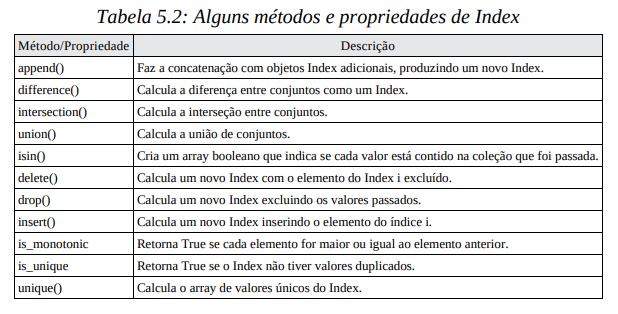

## 5.2 Funcionalidades essenciais

`reindex` cria um novo objeto com os valores reorganizados para ficarem alinhados com o novo índice:

In [7]:
import pandas as pd
import numpy as np

In [3]:
obj = pd.Series([4.5,7.2,-5.3,3.6], index=["d","b","a","c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Chamar `reindex` nessa Series reorganizará os dados de acordo com o novo índice, introduzindo valores ausentes se algum valor de índice não estiver presente:

In [4]:
obj2 = obj.reindex(["a","b","c","d","e"])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Para dados ordenados, como os de uma série temporal, você pode querer fazer alguma interpolação ou preenchimento de valores na reindexação. A opção `method` permite fazer isso, com o uso de um método como `ffill`, que repete o valor no preenchimento do próximo item: 

In [5]:
obj3 = pd.Series(["blue","purple","yellow"], index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [8]:
obj3.reindex(np.arange(6), method="ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

Com DataFrame, `reindex` pode alterar o índice (linha), as colunas ou ambos.
Quando recebe apenas uma sequência, ele reindexa as linhas no resultado:

In [9]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index=["a","c","d"], columns=["Ohio","Texas","California"])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [10]:
frame2 = frame.reindex(index=["a","b","c","d"])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


As colunas podem ser reindexadas com a palavra-chave `columns`:

In [11]:
states = ["Texas","Utah","California"]
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Já que "Ohio" não estava em "states", os dados dessa coluna não entraram no resultado.


Outra maneira de reindexar um eixo específico é passando os rótulos do novo eixo como argumento posicional e especificando o eixo para reindexação com a palavra-chave `axis`:

In [12]:
frame.reindex(states, axis="columns")

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


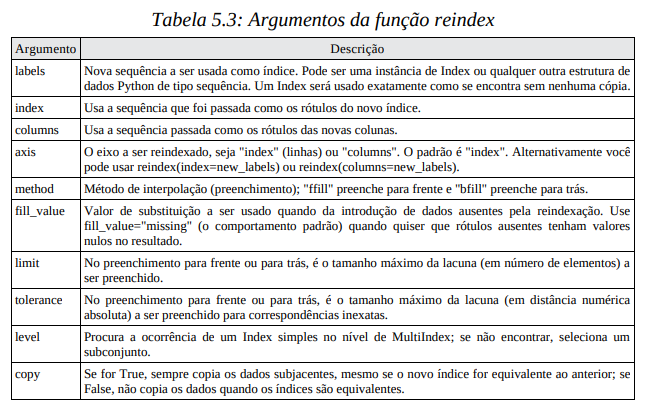

### Remoção de entradas de um eixo

In [13]:
obj = pd.Series(np.arange(5), index=["a","b","c","d","e"])
obj

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [14]:
new_obj = obj.drop("c")
new_obj

a    0
b    1
d    3
e    4
dtype: int64

In [15]:
obj.drop(["d","c"])

a    0
b    1
e    4
dtype: int64

In [16]:
data = pd.DataFrame(np.arange(16).reshape((4,4)), index=["Ohio", "Colorado", "Utah", "New York"], columns=["one","two","three","four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Chamar `drop` com uma sequência de rótulos removerá valores de rótulos das linhas (eixo 0)

In [17]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Para remover rótulos das colunas, use a palavra-chave `columns`:

In [18]:
data.drop(columns=["two"])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


Você também pode remover valores das colunas passando `axis=1` (como no NumPy) ou `axis="columns"`:

In [19]:
data.drop("two", axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [20]:
data.drop(["two", "four"], axis="columns")

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexação, seleção e filtragem

In [21]:
obj = pd.Series(np.arange(4), index=["a","b","c","d"])
obj

a    0
b    1
c    2
d    3
dtype: int64

In [22]:
obj["b"]

np.int64(1)

In [23]:
obj[1]

C:\Users\isaia\AppData\Local\Temp\ipykernel_10088\2469632899.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[1]


np.int64(1)

In [24]:
obj[2:4]

c    2
d    3
dtype: int64

In [25]:
obj[["b","a","d"]]

b    1
a    0
d    3
dtype: int64

In [26]:
obj[[1,3]]

C:\Users\isaia\AppData\Local\Temp\ipykernel_10088\1781339481.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[[1,3]]


b    1
d    3
dtype: int64

In [27]:
obj[obj<2]

a    0
b    1
dtype: int64

Embora você possa selecionar dados por rótulo desta forma, a melhor maneira de selecionar valores de índice é com operador especial `loc`:

In [28]:
obj.loc[["b","a","d"]]

b    1
a    0
d    3
dtype: int64

O operador `loc` é considerado melhor por causa do tratamento diferente dado aos inteiros na indexação com []. A indexação comum baseada em [] tratará os inteiros como rótulos se o índice contiver inteiros, logo, o comportamento diferirá dependendo do tipo de dado do índice.

In [29]:
obj1 = pd.Series([1,2,3], index=[2,0,1])
obj2 = pd.Series([1,2,3], index=["a","b","c"])
obj1

2    1
0    2
1    3
dtype: int64

In [30]:
obj2

a    1
b    2
c    3
dtype: int64

In [31]:
obj1[[0,1,2]]

0    2
1    3
2    1
dtype: int64

In [32]:
obj2[[0,1,2]]

C:\Users\isaia\AppData\Local\Temp\ipykernel_10088\2179584337.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj2[[0,1,2]]


a    1
b    2
c    3
dtype: int64

Com o uso de `loc`, a expressão `obj.loc[[0,1,2]]` falhará quando o índice não contiver inteiros:

In [33]:
obj2.loc[[0,1]]

KeyError: "None of [Index([0, 1], dtype='int64')] are in the [index]"

Já que o operador `loc` faz a indexação exclusivamente com rótulos, também existe um operador `iloc` que indexa exclusivamente com inteiros para funcionar consistentemente se o índice contiver ou não inteiros:

In [34]:
obj1.iloc[[0,1,2]]

2    1
0    2
1    3
dtype: int64

In [35]:
obj2.iloc[[0,1,2]]

a    1
b    2
c    3
dtype: int64

Você também pode fazer o fatiamento com rótulos, mas ele funcionará diferentemente do fatiamento normal do Python porque a extremidade final será incluída:

In [36]:
obj2.loc["b":"c"]

b    2
c    3
dtype: int64

Atribuir valores com o uso desses métodos modificará a seção correspondente da Series:

In [37]:
obj2.loc["b":"c"] = 5
obj2

a    1
b    5
c    5
dtype: int64

A indexação em um DataFrame recupera uma ou mais colunas com um único valor ou uma sequência:

In [38]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=["Ohio","Colorado","Utah","New York"],
                    columns=["one","two","three","four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [39]:
data["two"]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [40]:
data[["three","one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Uma indexação como essa tem alguns casos especiais. O primeiro é fatiar ou selecionar dados com um array booleano:

In [41]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [42]:
data[data["three"]>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


A sintaxe de seleção de linhas `data[:2]` é fornecida como conveniência. Passar um único elemento ou uma lista para o operador [] seleciona colunas.
Outro caso de uso seria a indexação com um DataFrame booleano, como um que fosse produzido por uma comparação escalar. Considere um DataFrame em que todos os valores fossem produzidos pela comparação com um valor escalar:

In [43]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


Podemos usar esse DataFrame para atribuir o valor 0 a cada local onde haja o valor `true`, desta forma:

In [44]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15
